In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vtl.Photo import Photometry
from scipy.interpolate import interp1d
from BE_spec_id import Single_gal_fit_full
from BE_spec_id import B_factor, B_factor_2
from spec_id import Gen_spec, Median_w_Error
from matplotlib import gridspec
import fsps
import pandas as pd
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
Zfs = np.array([0.004,0.008,0.019])
Zbc = np.array([0.004,0.008,0.02])
Ztau = [8,8.48,8.7,8.85,8.95,9.04,9.11,9.18,9.23,9.28]
age=np.arange(.5,6.1,.1)

metal=np.arange(0.002,0.031,0.001)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

bctau = [8,8.48,8.7,8.85,8.95,9.04,9.11,9.18,9.23,9.28]

In [16]:
lmass = galDB['lmass'].values

In [9]:
np.median(lmass)

10.9

In [19]:
print np.percentile(lmass,25)
print np.percentile(lmass,50)
print np.percentile(lmass,75)

10.62
10.86
10.92


In [15]:
33/4.*

8.25

In [3]:
for i in galDB.index:
    Single_gal_fit_full(Zfs,age,np.array(tau),galDB['hi_res_specz'][i],galDB['gids'][i],'BE_fs_%s' % galDB['gids'][i])
    Single_gal_fit_full(Zbc,age,tau,galDB['hi_res_specz'][i],galDB['gids'][i],'BE_bc_%s' % galDB['gids'][i] ,bc03=True)


No TEAL-based tasks available for this package!
../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../data/galaxy_flts/n16758_flt.detect.cat


IOError: [Errno 2] No such file or directory: '../../../fsps_models_for_fit/fsps_spec/m0.004_a0.5_dt0.0_spec.npy'

In [6]:
Bfs1 = []

for i in galDB.index:
    Bfs1.append(B_factor('../BE/BE_fs_%s_chidata.npy' % galDB['gids'][i],
                        '../BE/BE_bc_%s_chidata.npy' % galDB['gids'][i],galDB['hi_res_specz'][i],Zfs,Zbc,age,Ztau))
    

In [3]:
Bfs = []

for i in galDB.index:
    Bfs.append(B_factor_2('../chidat/%s_dtau_chidata.npy' % galDB['gids'][i],
                        '../BE/BE_bc_%s_chidata.npy' % galDB['gids'][i],galDB['hi_res_specz'][i],
                        metal,Zbc,age,tau,Ztau))

In [4]:
bc_Z = []
bc_t = []

for i in galDB.index:
    Z,PZ = np.load('../BE/BE_bc_%s_Z_pos.npy' % galDB['gids'][i])
    mds,ml,mh = Median_w_Error(PZ,Z)
    bc_Z.append(mds)

    t,Pt = np.load('../BE/BE_bc_%s_t_pos.npy' % galDB['gids'][i])
    mds,ml,mh = Median_w_Error(Pt,t)
    bc_t.append(mds)

4.98671488655


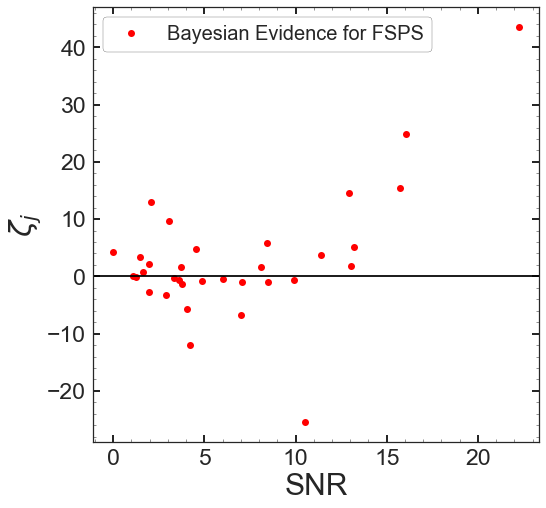

In [11]:
%matplotlib inline

print np.mean(Bfs)

plt.figure(figsize=[8,8])
plt.plot(galDB['SN'],Bfs1,'ro',label = 'Bayesian Evidence for FSPS')
plt.axhline(0,color = 'k')
plt.xlabel('SNR',fontsize=30)
plt.ylabel('$\zeta_j$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.minorticks_on()
plt.legend(fontsize=20,frameon=True,edgecolor='k')
plt.savefig('../plots/BE_v_snr.pdf',bbox_inches = 'tight')

In [10]:
print sum(Bfs)
print np.mean(Bfs)

164.561591256
4.98671488655


In [13]:
np.array([galDB['gids'].values,galDB['SN'].values , Bfs]).T

array([['n16758', 8.44769611038553, -25.105719507685055725],
       ['n17070', 4.178582237538188, 4.5148764203235438996],
       ['n19442', 1.1109152630598553, 1.3077215816229304277],
       ['n21156', 12.686546939404833, 17.825952437937454199],
       ['n21427', 2.2380752971780398, 2.5263548765421356788],
       ['n23435', 2.6425564585173196, 1.1687443494710872814],
       ['n32566', 4.824775087042914, 1.6377919527374968975],
       ['n34694', 8.557675232988842, 5.0825020948113547119],
       ['n37686', 7.011179180815427, 8.5526880807648693605],
       ['s35774', 9.719072346984916, 9.0805600607696817343],
       ['s38785', 5.799220414879738, 0.50288104266561271219],
       ['s39012', 1.4813442049408856, 5.0379115808309405484],
       ['s39170', 16.006232025906748, 45.78723620869229579],
       ['s39241', 9.644927992934258, 3.7326275023735493795],
       ['s39631', 7.36721374160757, 1.9240724724728016159],
       ['s39804', 3.8085340330900768, -3.2756980213560468553],
       ['s39805',

In [32]:
np.array([galDB['gids'].values,bc_t,bc_Z]).T

array([['n16758', 5.0, 0.02],
       ['n17070', 3.2, 0.0079999999999999999997],
       ['n19442', 2.8, 0.02],
       ['n21156', 2.0999999999999999999, 0.02],
       ['n21427', 2.5, 0.02],
       ['n23435', 3.3, 0.02],
       ['n32566', 2.3, 0.02],
       ['n34694', 2.3, 0.02],
       ['n37686', 2.8, 0.02],
       ['s35774', 4.0999999999999999999, 0.0079999999999999999997],
       ['s38785', 2.8, 0.02],
       ['s39012', 2.2, 0.02],
       ['s39170', 3.5, 0.02],
       ['s39241', 3.9000000000000000001, 0.02],
       ['s39631', 4.8000000000000000002, 0.02],
       ['s39804', 3.4000000000000000001, 0.02],
       ['s39805', 2.4000000000000000001, 0.02],
       ['s40223', 2.0999999999999999999, 0.02],
       ['s40476', 2.2, 0.02],
       ['s40597', 3.0999999999999999999, 0.0079999999999999999997],
       ['s40623', 3.0, 0.02],
       ['s40862', 2.7, 0.02],
       ['s41148', 1.2, 0.02],
       ['s41520', 1.4, 0.02],
       ['s41659', 2.0, 0.02],
       ['s43615', 5.0, 0.02],
       ['s44042'

In [11]:
spec1 = Gen_spec(galDB['gids'][96], galDB['hi_res_specz'][96])
spec1.Median_spec(galDB['Z_lwa'][96], galDB['t_lwa'][96], tau)
spec1.Median_spec_BC03(0.02,2.3,bctau)

../data/galaxy_flts/n34694_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n34694_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n34694_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n34694_flt: save ../data/galaxy_flts/n34694_flt.detect_seg.fits, ../data/galaxy_flts/n34694_flt.detect.cat


In [15]:
spec2 = Gen_spec(galDB['gids'][220], galDB['hi_res_specz'][220])
spec2.Median_spec(galDB['Z_lwa'][220], galDB['t_lwa'][220], tau)
spec2.Median_spec_BC03(0.02,3.5,bctau)

../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../data/galaxy_flts/s39170_flt.detect.cat


In [19]:
galDB['hi_res_specz'][galDB['gids']=='n34694']

96    1.145
Name: hi_res_specz, dtype: float64

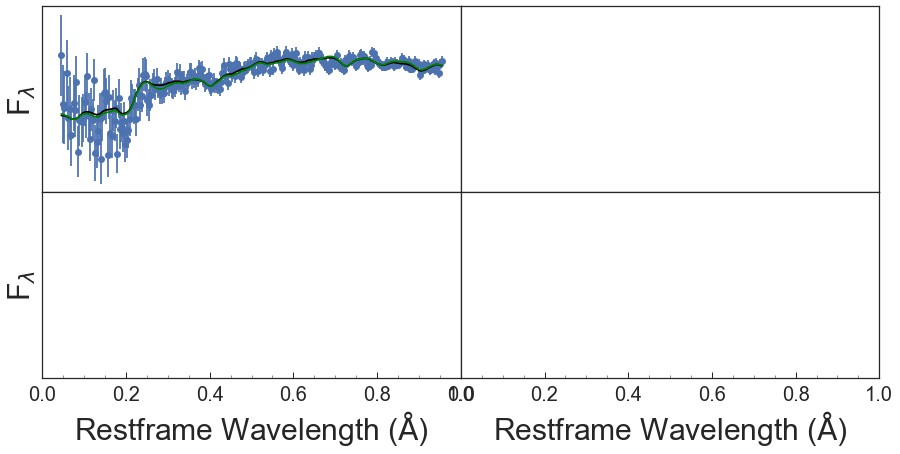

In [12]:
%matplotlib inline
gs = gridspec.GridSpec(2,2,wspace=0,hspace=0)
plt.figure(figsize=(15,8))
plt.subplot(gs[0,0])
plt.errorbar(spec1.gal_wv,spec1.gal_fl,spec1.gal_er,fmt='o')
plt.plot(spec1.gal_wv,spec1.fl, color='k',zorder=3)
plt.plot(spec1.gal_wv,spec1.fl_bc, color='g',zorder=3)

plt.xticks([])
plt.yticks([])
plt.ylabel('F$_\lambda$',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().subplots_adjust(bottom=0.235)
# plt.text(4500,1,'FSPS Model',fontsize=20)
plt.minorticks_on()

plt.subplot(gs[0,1])
# plt.plot(spec.gal_wv_rf,spec.fl*1E18, color='k', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().subplots_adjust(bottom=0.235)
# plt.text(4000,1,'Forward Modeled Grism Spectra',fontsize=20)
plt.minorticks_on()

plt.subplot(gs[1,0])
# plt.plot(spec.gal_wv_rf,spec.flx_err*1E18, color='k',linewidth=2)
plt.yticks([])
plt.ylabel('F$_\lambda$',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().subplots_adjust(bottom=0.235)
# plt.text(4500,1,'Simulated Data',fontsize=20)
plt.minorticks_on()

plt.subplot(gs[1,1])
# plt.plot(spec.gal_wv_rf,spec.nc_flx_err, color='k', linewidth=2)
plt.yticks([])
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().subplots_adjust(bottom=0.235)
# plt.text(3900,.44,'Simulated Data Without Continuum',fontsize=20)
plt.minorticks_on()

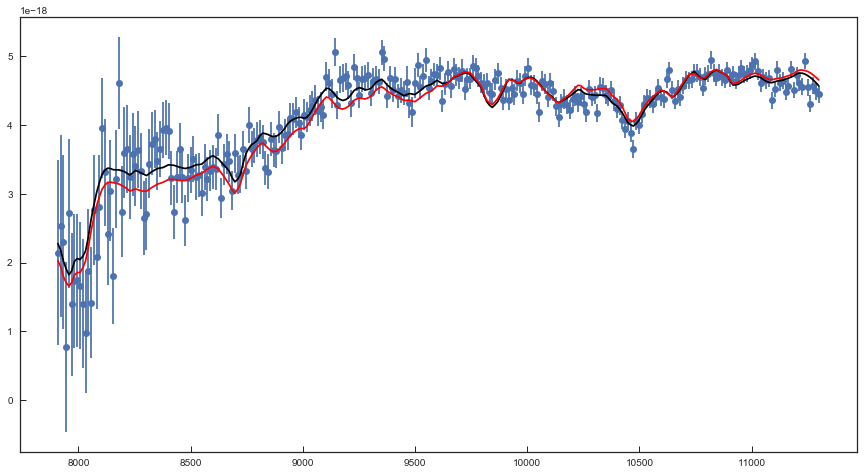

In [16]:
plt.figure(figsize=(15,8))
plt.errorbar(spec2.gal_wv,spec2.gal_fl,spec2.gal_er,fmt='o')
plt.plot(spec2.gal_wv,spec2.fl, color='k',zorder=3)
plt.plot(spec2.gal_wv,spec2.fl_bc, color='r',zorder=3)

In [20]:
Zb,PZb = np.load('../BE/BE_bc_n34694_Z_pos.npy')
Z,PZ = np.load('../chidat/n34694_dtau_Z_pos_lwa.npy')

tb,Ptb = np.load('../BE/BE_bc_n34694_t_pos.npy')
t,Pt = np.load('../chidat/n34694_dtau_t_pos_lwa.npy')


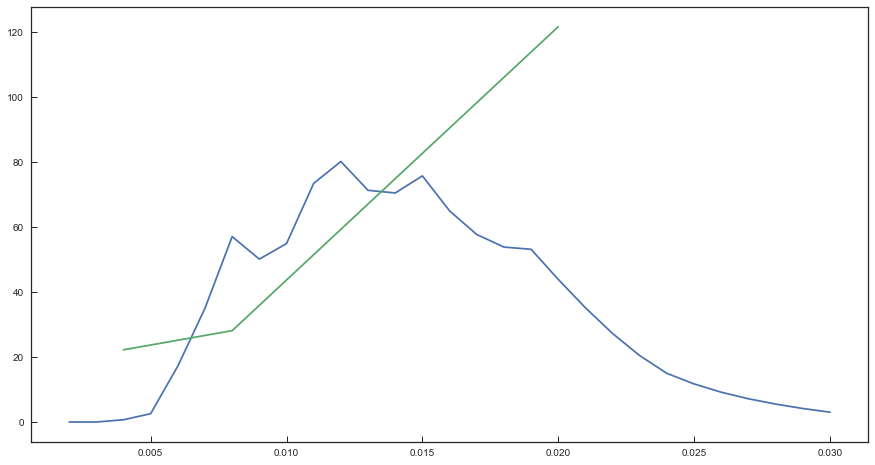

In [22]:
plt.figure(figsize=(15,8))
plt.plot(Z,PZ)
plt.plot(Zb,PZb)